In [1]:
import numpy
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from numba import njit,jit

import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None
    
    def __enter__(self):
        """Start a new timer as a context manager"""
        self.start()
        return self

    def __exit__(self, *exc_info):
        """Stop the context manager timer"""
        self.stop()


    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")
        
from sparse_lda_algorithms import run_bio

AttributeError: module 'numpy.random' has no attribute 'PRNGKey'

### Data generation

In [ ]:
err1s = []
err2s = []
err3s = []
err4s = []
err5s = []

acc1s = []
acc2s = []
acc3s = []
acc4s = []
acc5s = []

In [ ]:
key = random.PRNGKey(0)
x_dim = 5 # dimension of observations
freq = 0.1 # frequency of class 2 samples
mu_1 = 1*randn(key, (x_dim,1)) - 1 # mean of class 1
mu_2 = 1*randn(key, (x_dim,1)) + 1 # mean of class 2
sig = randn(key, (x_dim,x_dim))/np.sqrt(x_dim)
Sigma = sig@sig.T
samples = 100000 # number of data points

In [ ]:
freq = 0.1 # frequency of class 2 samples

In [ ]:
class_1 = mu_1 + sig@randn(key, (x_dim,int(samples*(1-freq))))
class_2 = mu_2 + sig@randn(key, (x_dim,int(samples*freq)))

In [ ]:
X = np.concatenate((class_1,class_2),axis=1)
Y = numpy.zeros((2,samples)); Y[0,:int(samples*(1-freq))] = 1; Y[1,-int(samples*freq):] = 1
idx = random.permutation(key,samples)
X = X[:,idx]
Y = Y[:,idx]
Y = np.array(Y)

In [ ]:
plt.scatter(class_1[0],class_1[1],s=1)
plt.scatter(class_2[0],class_2[1],s=1)
plt.grid()
plt.show()

In [ ]:
def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)


### Optimal solution

In [ ]:
w_opt = np.linalg.inv(Sigma)@(mu_1-mu_2)
w_opt = w_opt/np.sqrt(w_opt.T@(Sigma)@w_opt)

In [ ]:
obj_opt = (w_opt.T@(mu_1-mu_2))**2

In [ ]:
plt.scatter(w_opt.T@class_1,np.zeros((w_opt.T@class_1).shape),s=5)
plt.scatter(w_opt.T@class_2,np.zeros((w_opt.T@class_2).shape),s=5)
plt.grid()
plt.show()

In [ ]:
(np.sum(w_opt.T@class_1 > 1/2 * w_opt.T@(mu_1+mu_2))  + np.sum(w_opt.T@class_2 < 1/2 * w_opt.T@(mu_1+mu_2)))/samples

### Offline algorithm

In [ ]:
# eta = 1e-3; gam = 1e2*eta; iters = 100000

In [ ]:
# obj = np.zeros(iters)
# err = np.zeros(iters)
# acc = np.zeros(iters)

# @jit(nopython=True)
# def fit(w, l, mu_1, mu_2, Sigma):
#     w = w + eta*(mu_1 - mu_2 - l*Sigma@w)
#     l = l + gam*((w.T@Sigma@w).item() - 1)
    
#     return w, l
        
# def run_offline(mu_1, mu_2, Sigma, eta, gamma, iters):
    
#     w = np.random.randn(x_dim,1)/np.sqrt(x_dim)
#     l = 1
    
#     for i_iter in tqdm(range(iters)):
#         w, l = fit(w, l, mu_1, mu_2, Sigma)
#         obj[i_iter] = (w.T@(mu_1-mu_2))**2/(w.T@Sigma@w)
#         err[i_iter] = np.linalg.norm(w[:,0] - w_opt[:,0])**2
#         acc[i_iter] = (np.sum(w.T@class_1 > 1/2 * w.T@(mu_1+mu_2))  + np.sum(w.T@class_2 < 1/2 * w.T@(mu_1+mu_2)))/samples
#         #err[i_iter] = (obj_opt - obj[i_iter])/obj_opt
#     return w,l

# w,l = run_offline(mu_1, mu_2, Sigma, eta, gam, iters)

In [ ]:
# plt.loglog(range(iters), err)
# plt.ylabel("Error")
# plt.xlabel("t")
# plt.title("Offline convergence")
# plt.show()
# plt.loglog(range(iters), acc)
# plt.ylabel("Accuracy")
# plt.xlabel("t")
# plt.title("Offline convergence")
# plt.show()

In [ ]:
# (np.sum(w.T@class_1 > 1/2 * w.T@(mu_1+mu_2))  + np.sum(w.T@class_2 < 1/2 * w.T@(mu_1+mu_2)))/samples

### Online algorithm

In [ ]:
# import pickle
# with open('vars.pickle', 'rb') as f:
#     v = pickle.load(f)zzzz
# import pickle
# with open('vars.pickle', 'wb') as f:
#     pickle.dump([err1s, err2s, err3s, err4s, err5s, acc1s, acc2s, acc3s, acc4s, acc5s], f)

In [ ]:
# err1s = []
# err2s = []
# err3s = []
# err4s = []
# err5s = []

# acc1s = []
# acc2s = []
# acc3s = []
# acc4s = []
# acc5s = []

In [ ]:
e = 5e-6; e2=5e-6; gam = 1e2;  epochs = int(1e3); total_epochs = int(1) * epochs; iters = epochs*samples; every = 10;
for i in range(1):
    w = randn(key, (x_dim,))/np.sqrt(x_dim)
    l = 1
    c = 0
    zeta = 0
    l_ = 1
    mu = np.zeros(x_dim)
    err = np.zeros(iters)
    acc = np.zeros(iters)
    w, l, c, zeta, l_, mu, err, acc, step = run_bio(w, l, c, zeta, l_, mu, X, Y, err, acc, 0, epochs, every, e, e2, gam, samples, w_opt)
#     print(f"step: {step}")
#     print(f"itr: {itr}, err: {err[(itr+1)*samples-1]}, acc:{acc[(itr+1)*samples-1]}")
    plt.loglog(err)
    plt.show()
    if freq == 0.01:
        err1s.append(err)
        acc1s.append(acc)
    elif freq == 0.05:
        err2s.append(err)
        acc2s.append(acc)
    elif freq == 0.1:
        err3s.append(err)
        acc3s.append(acc)
    elif freq == 0.25:
        err4s.append(err)
        acc4s.append(acc)
    elif freq == 0.5:
        err5s.append(err)
        acc5s.append(acc)

In [ ]:
# e = 1e-6; e2=1e-6; gam = 1e2;  epochs = int(1e2); total_epochs = int(1) * epochs; iters = total_epochs*samples
# for i in range(1):
#     w = np.random.randn(x_dim)/np.sqrt(x_dim)
#     l = 1
#     c = 0
#     zeta = 0
#     l_ = 1
#     mu = np.zeros(x_dim)
#     err = np.zeros(iters)
#     acc = np.zeros(iters)
#     for itr in tqdm(range(0,total_epochs, epochs)):
# #         print(f"w: {w}")
#         w, l, c, zeta, l_, mu, err, acc, step = run_bio(w, l, c, zeta, l_, mu, X, Y, err, acc, itr, itr+epochs, e, e2, gam, samples, w_opt)
#         print(f"step: {step}")
#         print(f"itr: {itr}, err: {err[(itr+1)*samples-1]}, acc:{acc[(itr+1)*samples-1]}")
#         plt.loglog(err[:(itr+1)*samples])
#         plt.show()
#     if freq == 0.01:
#         err1s.append(err)
#         acc1s.append(acc)
#     elif freq == 0.05:
#         err2s.append(err)
#         acc2s.append(acc)
#     elif freq == 0.1:
#         err3s.append(err)
#         acc3s.append(acc)
#     elif freq == 0.25:
#         err4s.append(err)
#         acc4s.append(acc)
#     elif freq == 0.5:
#         err5s.append(err)
#         acc5s.append(acc)

In [ ]:
plt.loglog(err[:(itr+1)*samples])
plt.show()

In [ ]:
plt.loglog(err)
plt.show()
plt.loglog(acc)
plt.show()

In [ ]:
def add_fill_lines(axis, t, err, plot_kwargs=None, ci_kwargs=None):
    """
    Parameters:
    ====================
    axis        -- Axis variable
    t           -- Array of time points
    err         -- The data matrix of errors over multiple trials
    plot_kwargs -- Arguments for axis.plot()
    ci_kwargs   -- Arguments for axis.fill_between()
    
    Output:
    ====================
    plot        -- Function axis.plot()
    fill        -- Function axis.fill_between() with standard deviation computed on a log scale
    """
        
    log_err = np.log(err+10**-5) # add 10**-5 to ensure the logarithm is well defined
    log_mu = log_err.mean(axis=0)
    sigma = np.std(log_err,axis=0)
    ci_lo, ci_hi = log_mu - sigma, log_mu + sigma
    plot_kwargs = plot_kwargs or {}
    ci_kwargs = ci_kwargs or {}
    plot = axis.loglog(t, np.exp(log_mu), **plot_kwargs)
    fill = axis.fill_between(t, np.exp(ci_lo), np.exp(ci_hi), alpha=.1, **ci_kwargs)
    
    return plot, fill

In [290]:
# err3s = err3s[0:2] + err3s[3:]

/Users/aneeshkashalikar/.pyenv/versions/3.7.10/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


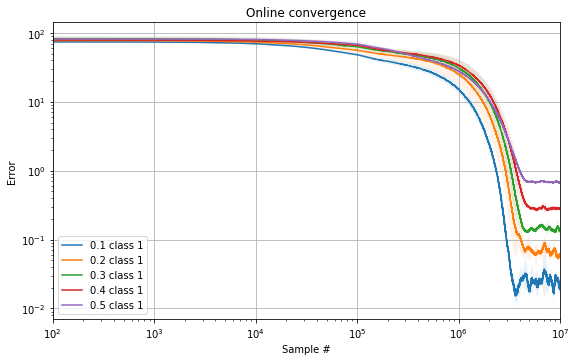

In [291]:
from matplotlib import gridspec
plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2,2)


ax1 = plt.subplot(gs[0,0])

add_fill_lines(ax1, range(iters), np.array(err1s), plot_kwargs = {"label": "0.1 class 1"})
add_fill_lines(ax1, range(iters), np.array(err2s), plot_kwargs = {"label": "0.2 class 1"})
add_fill_lines(ax1, range(iters), np.array(err3s), plot_kwargs = {"label": "0.3 class 1"})
add_fill_lines(ax1, range(iters), np.array(err4s), plot_kwargs = {"label": "0.4 class 1"})
add_fill_lines(ax1, range(iters), np.array(err5s), plot_kwargs = {"label": "0.5 class 1"})
plt.legend()
plt.title("Online convergence")
plt.ylabel("Error")
plt.xlabel("Sample #")
plt.xlim(1e2,iters)
plt.grid()
plt.show()

In [280]:
acc5s

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 

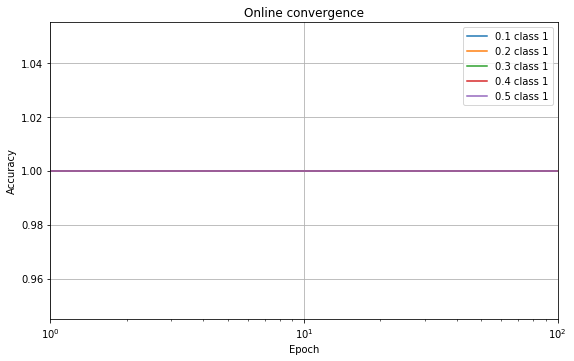

In [288]:
from matplotlib import gridspec
plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2,2)


ax1 = plt.subplot(gs[0,0])

add_fill_lines(ax1, range(epochs), np.array(acc1s), plot_kwargs = {"label": "0.1 class 1"})
add_fill_lines(ax1, range(epochs), np.array(acc2s), plot_kwargs = {"label": "0.2 class 1"})
add_fill_lines(ax1, range(epochs), np.array(acc3s), plot_kwargs = {"label": "0.3 class 1"})
add_fill_lines(ax1, range(epochs), np.array(acc4s), plot_kwargs = {"label": "0.4 class 1"})
add_fill_lines(ax1, range(epochs), np.array(acc5s), plot_kwargs = {"label": "0.5 class 1"})
plt.legend()
plt.title("Online convergence")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.xlim(1,epochs)
plt.grid()
plt.show()

In [ ]:
# plt.scatter(w.T@class_1,np.zeros((w.T@class_1).shape),s=5)
# plt.scatter(w.T@class_2,np.zeros((w.T@class_2).shape),s=5)
# plt.grid()
# plt.show()